In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

df = pd.read_csv("/Users/emmanual/Desktop/Movie-Success-Analyst/data/tmdb_5000_movies.csv")

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [45]:
df = df[(df["budget"] != 0) & (df["revenue"] != 0)]

df["roi"] = (df["revenue"] - df["budget"]) / df["budget"]

import ast
df["genres"] = df["genres"].apply(lambda x: [i['name'] for i in ast.literal_eval(x)])

df["main_genre"] = df["genres"].apply(lambda x: x[0] if len(x) > 0 else "Unknown")

df[["budget", "revenue", "roi", "main_genre"]].head()


,budget,revenue,roi,main_genre
0,237000000,2787965087,10.763566,Action
1,300000000,961000000,2.203333,Adventure
2,245000000,880674609,2.594590,Action
3,250000000,1084939099,3.339756,Action
4,260000000,284139100,0.092843,Action


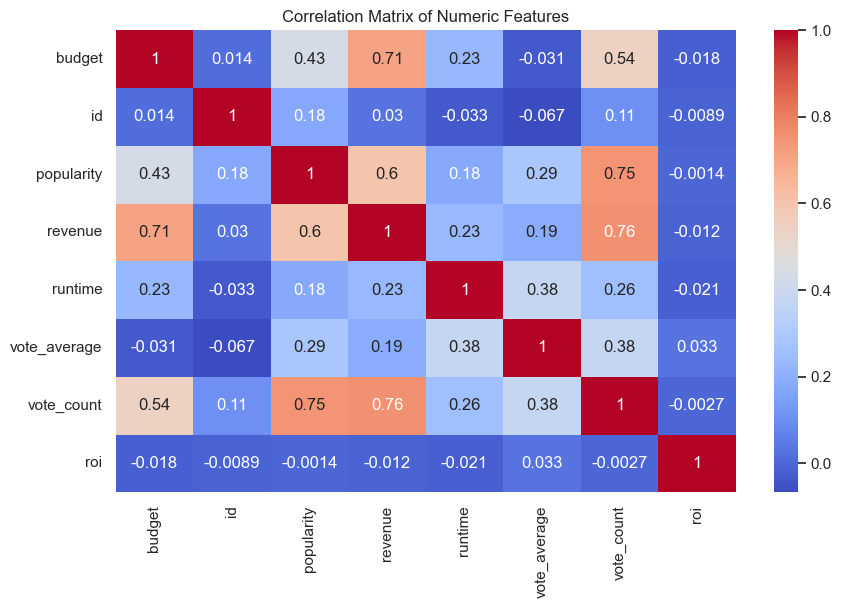

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [47]:
df = df.drop(columns=['id', 'release_date', 'original_language'])


In [48]:
df = df[(df["budget"] > 0) & (df["revenue"] > 0)]

q_high = df["budget"].quantile(0.99)
df = df[df["budget"] < q_high]

In [49]:
X = df.drop(columns=[
    'title',                
    'roi',                  
    'genres',               
    'homepage',             
    'keywords',             
    'original_title',       
    'overview',             
    'production_companies', # Complex strings
    'production_countries', # Complex strings
    'spoken_languages',     # Text
    'status',               # Categorical (skip for now)
    'tagline',              # Marketing fluff
    'main_genre'            # Already one-hot encoded earlier
])

Y = df["roi"]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=69
)


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 69)



In [52]:
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=69)

In [53]:
Y_pred_rf = rf_model.predict(X_test)


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Forest MAE: ", mean_absolute_error(Y_test, Y_pred_rf))
print("Forest MSE :", mean_squared_error(Y_test, Y_pred_rf))
print("Forest RMSE : ", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("Random Forest R² Score:", r2_score(Y_test, Y_pred_rf))

Forest MAE:  13375.871522997311
Forest MSE : 103685052772.22083
Forest RMSE :  322001.6347353237
Random Forest R² Score: 0.08440916935175036
